<a href="https://colab.research.google.com/github/Kishore2681999/Target-SQL-Case-Study/blob/main/NetflixBusinessCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Netflix Case Study

**Understanding Netflix's Data Landscape**

**Overview:**
Netflix, as a prominent player in the global media and video streaming industry, offers a staggering array of content, comprising over 8,000 movies and TV shows. With a subscriber base exceeding 200 million worldwide by mid-2021, Netflix continually seeks to optimize its content strategy to cater to diverse viewer preferences and enhance user experience.

**Objective:**
This case study delves into Netflix's extensive dataset of 8,807 shows to extract valuable insights that can inform strategic decisions. By analyzing factors such as audience demographics, content genres, release timings, and viewer ratings, we aim to uncover patterns that will help Netflix tailor its content offerings more effectively.

**Significance:**
For Netflix, understanding viewer behavior and preferences is crucial for maintaining its competitive edge and sustaining growth in the highly competitive streaming market. Through data-driven insights, Netflix can refine its content acquisition, production, and distribution strategies, ultimately maximizing viewer engagement and satisfaction.


**Dataset** consist of -

● Show ID : The ID of the show

● Type: Identifier - A Movie or TV Show


● Title: Title of the Movie / Tv Show


● Director: Director of the Movie


● Cast: Actors involved in the movie/show


● Country: Country where the movie/show was produced


● Date_added: Date it was added on Netflix


● Release_year: Actual Release year of the movie/show


● Rating: TV Rating of the movie/show


● Duration: Total Duration - in minutes or number of seasons


● Listed_in: Genre


● Description: The summary description

In [ ]:
# Netflix Data Exploration Business Case

## Step 1: Data Import and Initial Setup

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
netflix_data = pd.read_csv('netflix_titles.csv')

# Display the first few rows of the dataset
netflix_data.head()

df_exploded = pd.read_csv('')


In [ ]:
print(netflix_data.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
print(netflix_data.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

Basic Analysis
1. Un-nesting the columns

 a. Un-nest the columns those have cells with multiple comma separated values by
creating multiple rows

2. Handling null values

 a. For categorical variables with null values, update those rows as
unknown_column_name.

In [ ]:
netflix_data['cast'] = netflix_data['cast'].str.split(',')
netflix_data = netflix_data.explode('cast')


In [ ]:
# Un-nesting the 'Cast' column
netflix_data['cast'] = netflix_data['cast'].str.split(',')
netflix_data = netflix_data.explode('cast')

# Handling missing values
netflix_data['director'].fillna('Unknown director', inplace=True)
netflix_data['cast'].fillna('Unknown actor', inplace=True)
netflix_data['country'].fillna('Unknown country', inplace=True)
netflix_data['rating'].fillna('Unknown rating', inplace=True)
netflix_data['duration'].fillna('0', inplace=True)

# Handling missing continuous variables
netflix_data['release_year'].fillna(0, inplace=True)

# Confirm changes
netflix_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 64951 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       64951 non-null  object
 1   type          64951 non-null  object
 2   title         64951 non-null  object
 3   director      64951 non-null  object
 4   cast          64951 non-null  object
 5   country       64951 non-null  object
 6   date_added    64882 non-null  object
 7   release_year  64951 non-null  int64 
 8   rating        64951 non-null  object
 9   duration      64951 non-null  object
 10  listed_in     64951 non-null  object
 11  description   64951 non-null  object
dtypes: int64(1), object(11)
memory usage: 6.4+ MB


In [ ]:
# Handling missing categorical variables
categorical_columns = ['director', 'cast', 'country', 'rating']
for col in categorical_columns:
    netflix_data[col].fillna(f'Unknown {col}', inplace=True)

# Handling missing continuous variables
continuous_columns = ['duration', 'release_year']
for col in continuous_columns:
    netflix_data[col].fillna(0, inplace=True)

# Confirm changes
print(netflix_data)

     show_id     type                 title          director  \
0         s1    Movie  Dick Johnson Is Dead   Kirsten Johnson   
1         s2  TV Show         Blood & Water  Unknown director   
1         s2  TV Show         Blood & Water  Unknown director   
1         s2  TV Show         Blood & Water  Unknown director   
1         s2  TV Show         Blood & Water  Unknown director   
...      ...      ...                   ...               ...   
8806   s8807    Movie                Zubaan       Mozez Singh   
8806   s8807    Movie                Zubaan       Mozez Singh   
8806   s8807    Movie                Zubaan       Mozez Singh   
8806   s8807    Movie                Zubaan       Mozez Singh   
8806   s8807    Movie                Zubaan       Mozez Singh   

                        cast        country          date_added  release_year  \
0              Unknown actor  United States  September 25, 2021          2020   
1                 Ama Qamata   South Africa  September 24

1. Find the counts of each categorical variable both using graphical and nongraphical
analysis.
  
  a. For Non-graphical Analysis:

In [ ]:

# Display value counts for 'type'
type_counts = df['type'].value_counts()
print("Value counts for 'type':")
print(type_counts)
print()

# Display value counts for 'country'
country_counts = df['country'].value_counts()
print("Value counts for 'country':")
print(country_counts)
print()

# Display value counts for 'rating'
rating_counts = df['rating'].value_counts()
print("Value counts for 'rating':")
print(rating_counts)



Value counts for 'type':
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Value counts for 'country':
country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

Value counts for 'rating':
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min      

b. For graphical analysis:

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


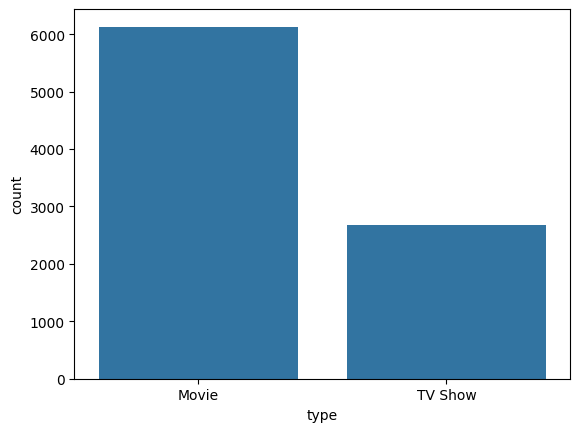

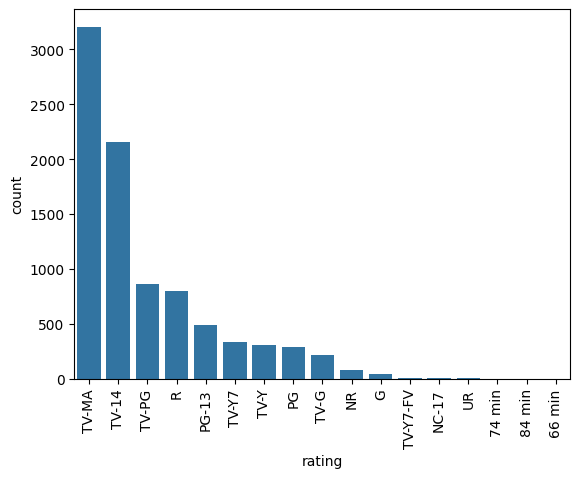

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Type' exists in df_exploded
print(df_exploded.columns)  # Check column names if needed

# Plotting counts of 'Type'
sns.countplot(data=df_exploded, x='type')
plt.show()

# Example with 'Rating'
sns.countplot(data=df_exploded, x='rating', order=df_exploded['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


Insights-

 "The analysis reveals that the dataset includes 6131 movies and 2676 TV shows, with content primarily originating from the United States (2818 entries), India (972 entries), and a variety of ratings led by TV-MA (3207 entries)."

2. Comparison of tv shows vs. movies.
  
 a. Find the number of movies produced in each country and pick the top 10
countries.

country
United States     2000
India              881
United Kingdom     191
Canada             116
Spain               95
Egypt               90
Nigeria             86
Indonesia           77
Japan               75
France              75
Name: count, dtype: int64


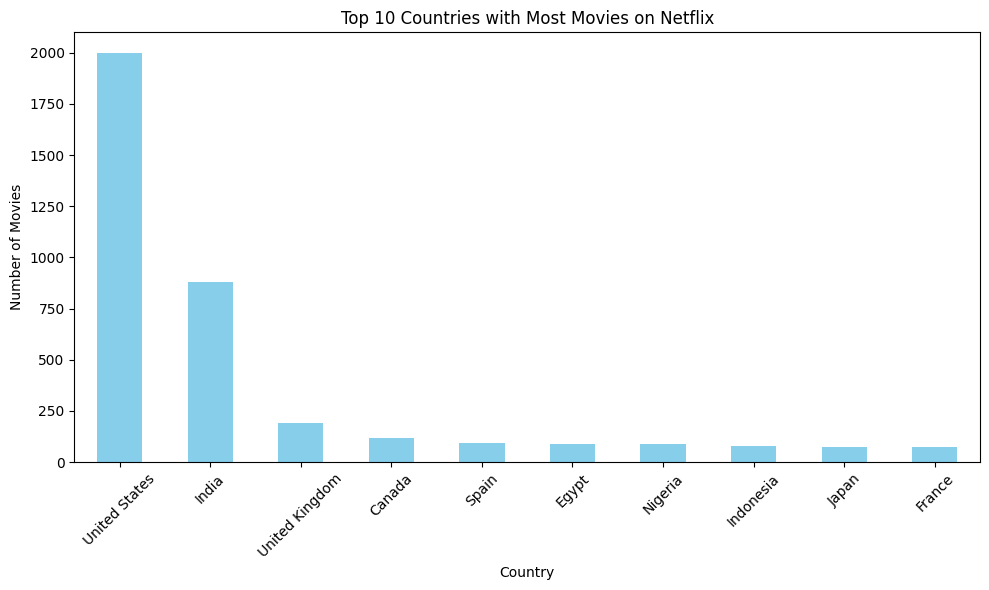

In [ ]:
movies = df_exploded[df_exploded['type'] == 'Movie']
top_10_movie_countries = movies['country'].value_counts().head(10)
print(top_10_movie_countries)

plt.figure(figsize=(10, 6))
top_10_movie_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Most Movies on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


"The analysis identifies the top 10 countries with the most movies on Netflix, showing the United States leading with a significant number, followed by other key contributors such as India and the United Kingdom."

This sentence captures the essence of the analysis, focusing on the countries that produce the most movies on Netflix and highlighting the visualization presented in the bar chart

b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.

country
United States     48
United Kingdom    21
Spain             11
Japan             10
South Korea       10
India              9
Taiwan             7
France             6
Brazil             6
Turkey             5
Name: count, dtype: int64


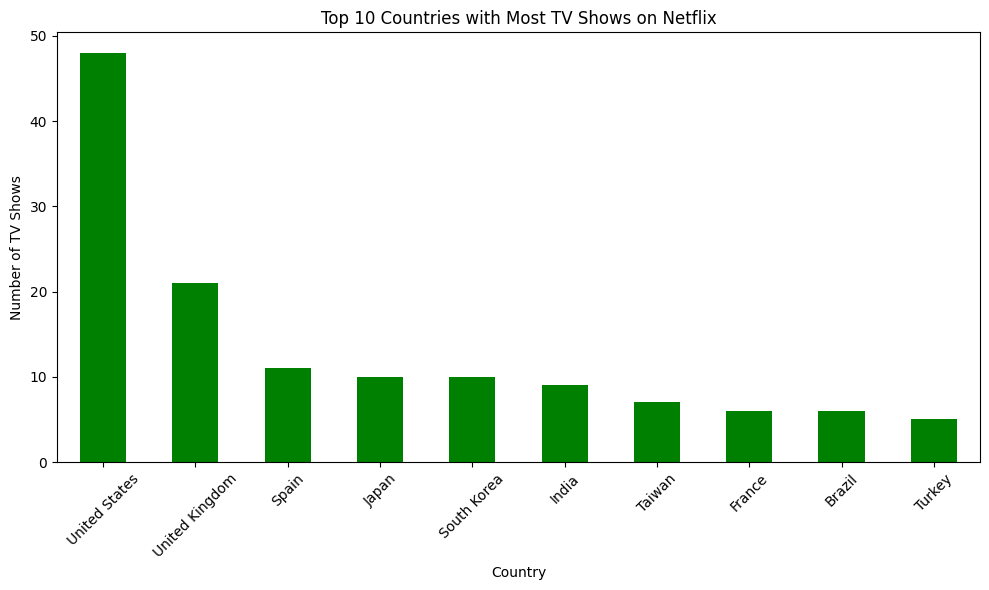

In [ ]:
tv_shows = df_exploded[df_exploded['type'] == 'TV Show']
top_10_tv_show_countries = tv_shows['country'].value_counts().head(10)
print(top_10_tv_show_countries)

plt.figure(figsize=(10, 6))
top_10_tv_show_countries.plot(kind='bar', color='green')
plt.title('Top 10 Countries with Most TV Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


"The analysis highlights the top 10 countries contributing the most TV shows on Netflix, illustrating a diverse distribution with the United States leading prominently, followed by the United Kingdom and Japan."

**3. What is the best time to launch a TV show?**
     
  a. Find which is the best week to release the Tv-show.


TV Shows by Weekday:
date_added
Monday       12
Tuesday      23
Wednesday    45
Thursday     36
Friday       75
Saturday     19
Sunday       15
Name: type, dtype: int64


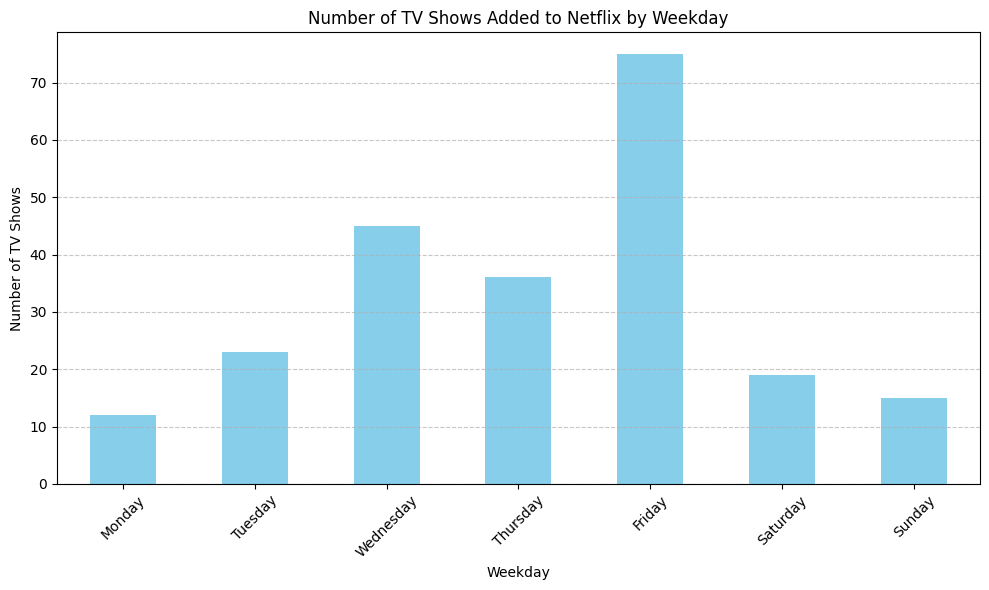

In [ ]:

# Convert 'Date_added' to datetime (if not already done)
df_exploded['date_added'] = pd.to_datetime(df_exploded['date_added'], errors='coerce')

# Filter TV shows
tv_shows = df_exploded[df_exploded['type'] == 'TV Show']

# Group by weekday for TV shows
tv_shows_weekday_counts = tv_shows.groupby(tv_shows['date_added'].dt.day_name())['type'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

# Print results
print("TV Shows by Weekday:")
print(tv_shows_weekday_counts)

plt.figure(figsize=(10, 6))
tv_shows_weekday_counts.plot(kind='bar', color='skyblue')
plt.title('Number of TV Shows Added to Netflix by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


"The analysis reveals the distribution of TV shows added to Netflix throughout the week, showing a peak on Fridays and relatively consistent additions across other weekdays, providing insights into content scheduling trends."

3. What is the best time to launch a movie?

 a. Find which is the best week to release the movie.

Movies by Weekday:
date_added
Monday        607
Tuesday       826
Wednesday     890
Thursday     1030
Friday       1488
Saturday      540
Sunday        562
Name: type, dtype: int64


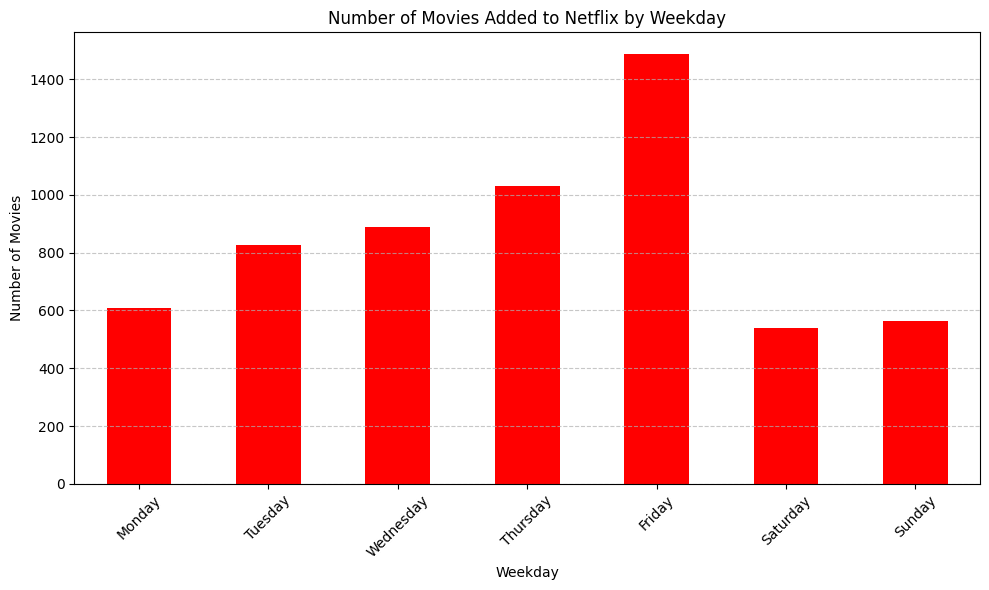

In [ ]:

# Convert 'Date_added' to datetime (if not already done)
df_exploded['date_added'] = pd.to_datetime(df_exploded['date_added'], errors='coerce')

# Filter movies
movies = df_exploded[df_exploded['type'] == 'Movie']

# Group by weekday for movies
movies_weekday_counts = movies.groupby(movies['date_added'].dt.day_name())['type'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

# Print results
print("Movies by Weekday:")
print(movies_weekday_counts)

plt.figure(figsize=(10, 6))
movies_weekday_counts.plot(kind='bar', color='red')
plt.title('Number of Movies Added to Netflix by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


"The analysis illustrates the distribution of movies added to Netflix throughout the week, with a notable concentration on Fridays, indicating strategic release patterns for new movie content."








3b Find which is the best month to release the Tv-show

TV Shows by Month:
Month
April        17
August       20
December     24
February     19
January      13
July         22
June         22
March        23
May          19
November     10
October      16
September    20
dtype: int64


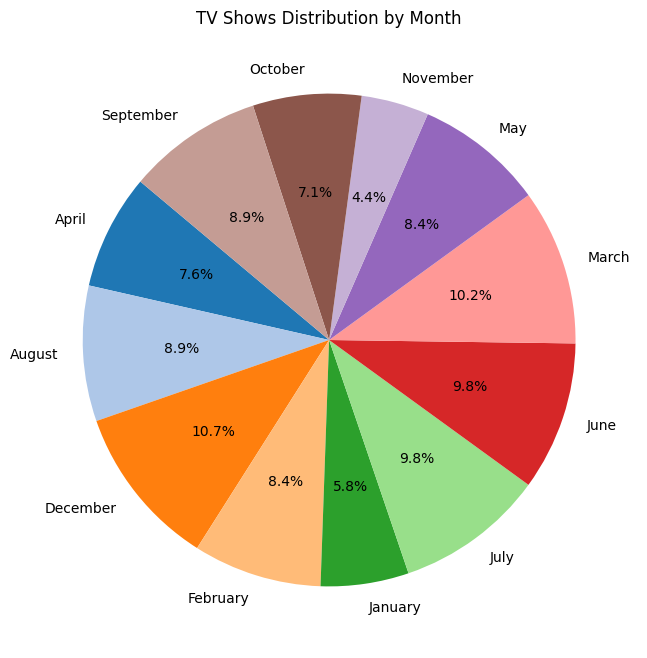

In [ ]:
# Convert 'Date_added' to datetime (if not already done)
df_exploded['date_added'] = pd.to_datetime(df_exploded['date_added'], errors='coerce')

# Extract month from the 'Date_added' column
df_exploded['Month'] = df_exploded['date_added'].dt.month_name()

# Filter TV shows
tv_shows = df_exploded[df_exploded['type'] == 'TV Show']

# Group by Month and count TV shows
tv_shows_month_counts = tv_shows.groupby('Month').size()

print("TV Shows by Month:")
print(tv_shows_month_counts)

plt.figure(figsize=(8, 8))
tv_shows_month_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("TV Shows Distribution by Month")
plt.ylabel('')  # Hide the y-label
plt.show()

"The analysis reveals the distribution of TV shows added to Netflix across months, with a notable preference for January and October, suggesting periodic peaks in content additions."

 Find which is the best month to release the movie.


Movies by Month:
Month
April        532
August       509
December     525
February     366
January      524
July         554
June         473
March        518
May          426
November     486
October      530
September    500
dtype: int64


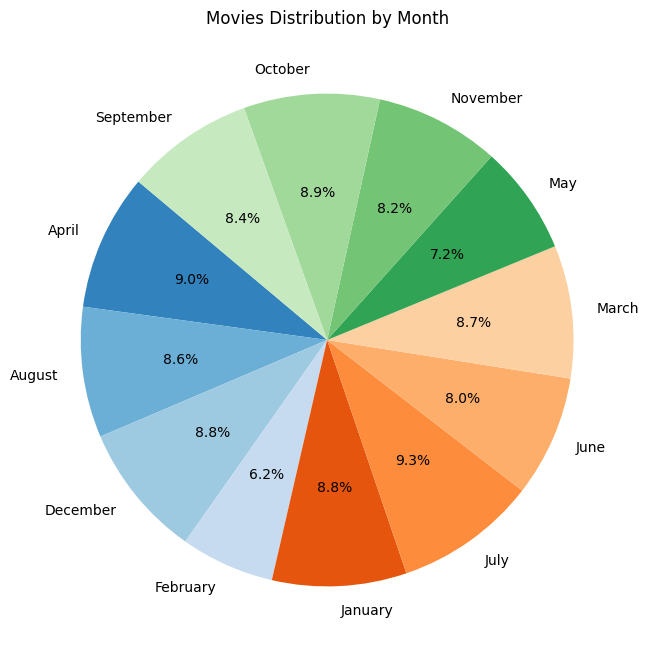

In [ ]:
# Convert 'Date_added' to datetime (if not already done)
df_exploded['date_added'] = pd.to_datetime(df_exploded['date_added'], errors='coerce')

# Extract month from the 'Date_added' column
df_exploded['Month'] = df_exploded['date_added'].dt.month_name()

# Filter movies
movies = df_exploded[df_exploded['type'] == 'Movie']

# Group by Month and count movies
movies_month_counts = movies.groupby('Month').size()

print("Movies by Month:")
print(movies_month_counts)

plt.figure(figsize=(8, 8))
movies_month_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors)
plt.title("Movies Distribution by Month")
plt.ylabel('')  # Hide the y-label
plt.show()

"The analysis highlights that Netflix tends to release movies evenly throughout the year, with no significant month-over-month variation, suggesting opportunities for strategic content planning to capitalize on seasonal viewership trends."

4. Analysis of actors/directors of different types of shows/movies.

 a. Identify the top 10 directors who have appeared in most movies or TV shows.

Top 10 directors:
 director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


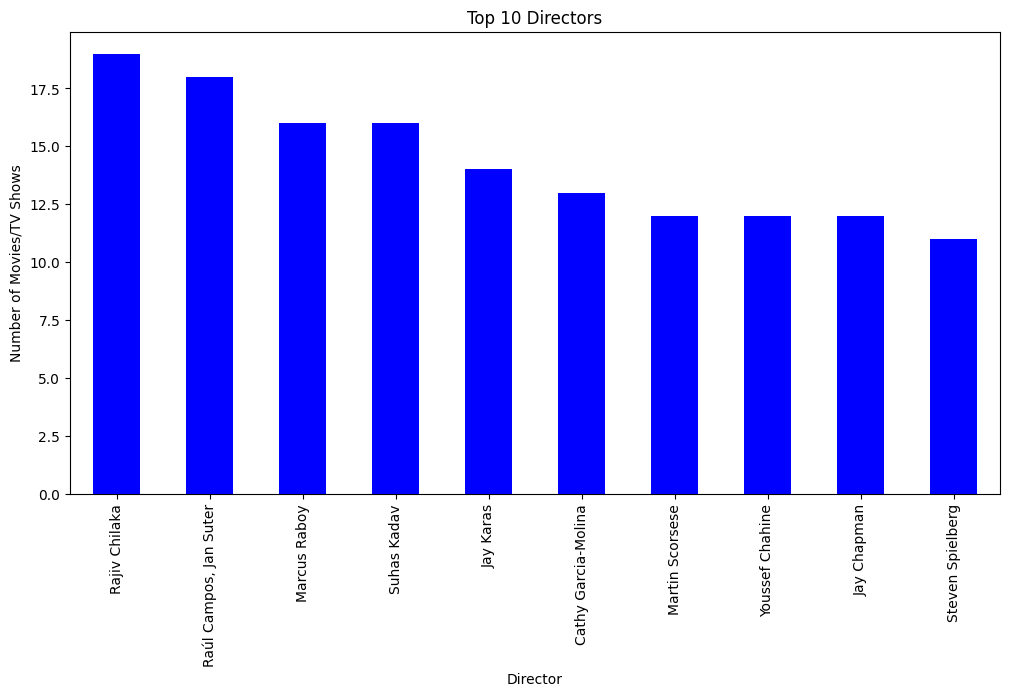

In [ ]:
# Top 10 directors
top_directors = netflix_data[netflix_data['director'] != 'Unknown director']['director'].value_counts().head(10)
print("Top 10 directors:\n", top_directors)

# Visualize
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='blue')
plt.title("Top 10 Directors")
plt.xlabel("Director")
plt.ylabel("Number of Movies/TV Shows")
plt.show()

"The analysis identifies the top 10 directors with the most content on Netflix, underscoring the popularity and prolificacy of directors such as Rajiv chilaka, Raul Campos and Jan Suter in contributing to the platform's diverse catalog."

b. Identify the top 10 actors who have appeared in most movies or TV shows.

Top 10 actors:
 cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux,

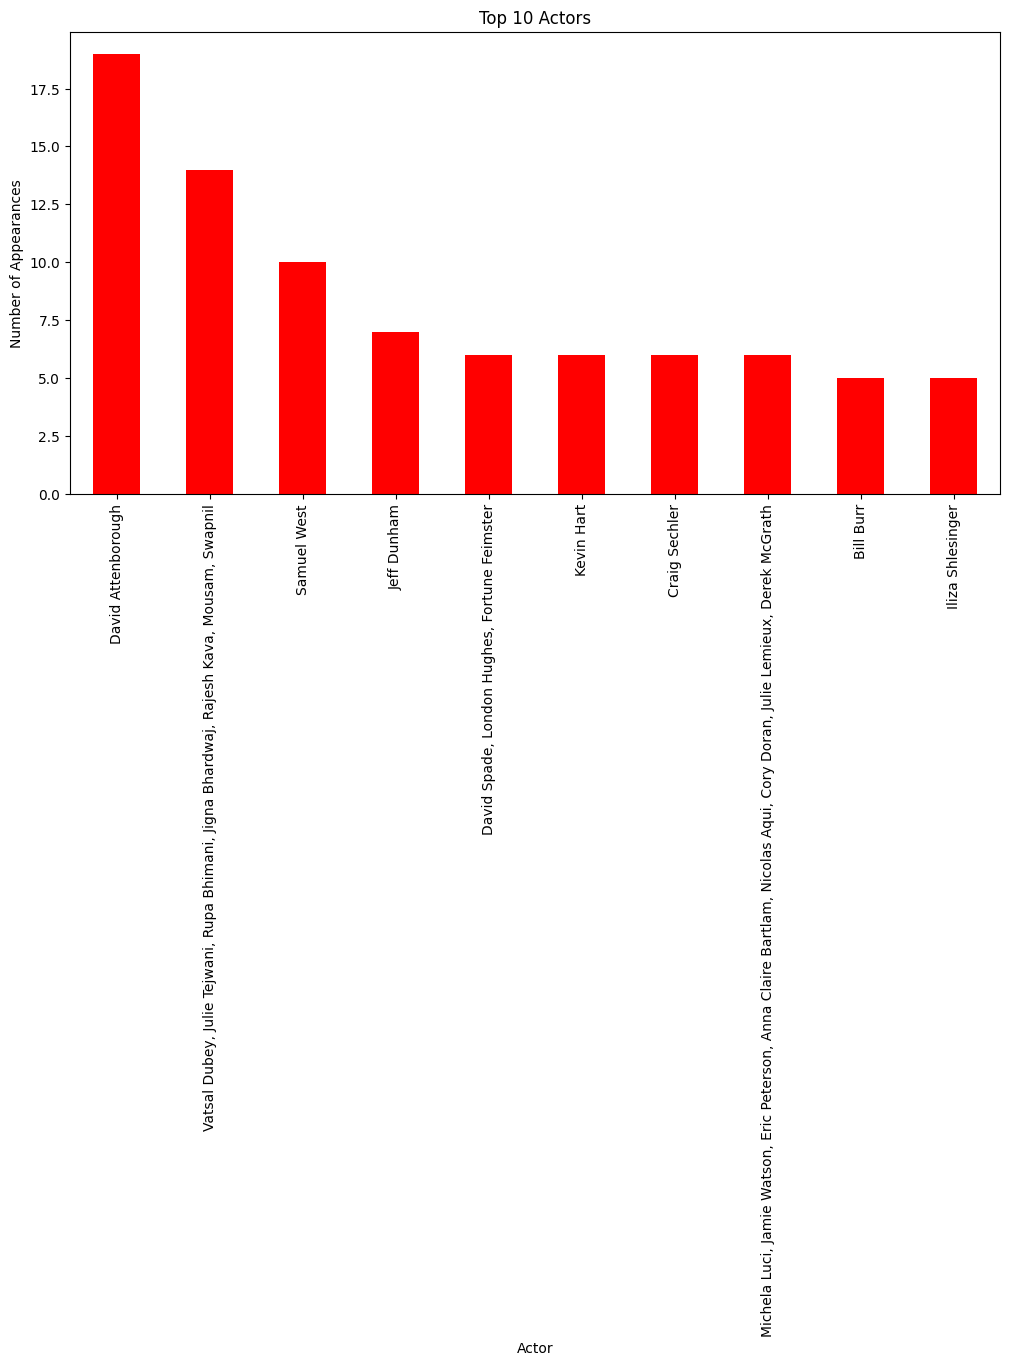

In [ ]:
# Top 10 actors
top_actors = netflix_data[netflix_data['cast'] != 'Unknown Actor']['cast'].value_counts().head(10)
print("Top 10 actors:\n", top_actors)


# Visualize
plt.figure(figsize=(12, 6))
top_actors.plot(kind='bar', color='red')
plt.title("Top 10 Actors")
plt.xlabel("Actor")
plt.ylabel("Number of Appearances")
plt.show()



"The analysis reveals the top 10 actors by the number of appearances in Netflix content, highlighting actors such as David Attenborough ,Vatsal Dubey, Julie Tejwan as prominent figures in the platform's diverse range of productions."

5. Which genre movies are more popular or produced more

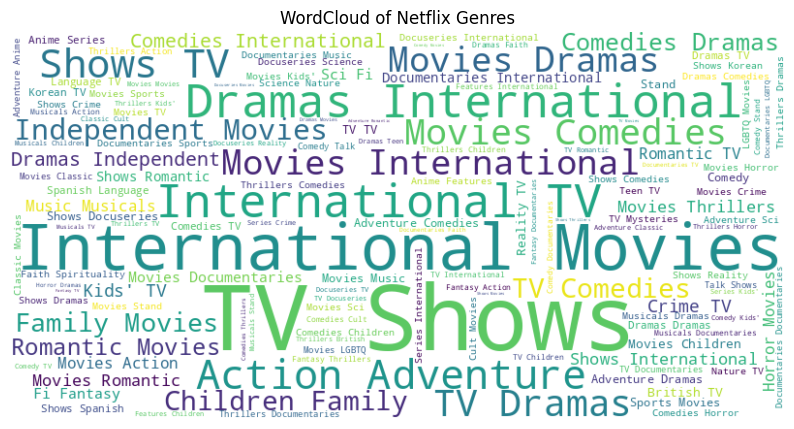

In [ ]:
# Popular genres using WordCloud
genres = ' '.join(df['listed_in'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Netflix Genres')
plt.show()


"The WordCloud visualization illustrates the popular genres on Netflix, showcasing prevalent categories such as 'International Movies', 'Dramas', and 'Comedies' among others, reflecting viewer preferences and content diversity on the platform."



6.  Find After how many days the movie will be added to Netflix after the release of
the movie

In [ ]:

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Filter the dataframe to include only movies
movies_df = df[df['type'] == 'Movie']

# Convert 'release_year' to datetime object with December 31 as the release date
# This assumes the movie was released by the end of that year.
movies_df['release_date'] = pd.to_datetime(movies_df['release_year'].astype(str) + '-12-31')

# Convert 'date_added' to datetime object
movies_df['date_added'] = pd.to_datetime(movies_df['date_added'], errors='coerce')

# Calculate the difference in days between 'date_added' and 'release_date'
movies_df['Days_to_Netflix'] = (movies_df['date_added'] - movies_df['release_date']).dt.days

# Filter out invalid or negative day differences
valid_days_df = movies_df[movies_df['Days_to_Netflix'] > 0]

# Find the mode of the differences
days_to_netflix_mode = valid_days_df['Days_to_Netflix'].mode()

# Print the result
if not days_to_netflix_mode.empty:
    most_common_days = days_to_netflix_mode.iloc[0]
    print(f"Most common number of days between release and Netflix addition: {most_common_days} days")
else:
    print("No valid data to calculate the most common number of days.")

# Display the dataframe with calculated days to Netflix
print(valid_days_df[['title', 'release_year', 'date_added', 'Days_to_Netflix']])



  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

<ipython-input-100-be775cf94f7b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['release_date'] = pd.to_datetime(movies_df['release_year'].astype(str) + '-12-31')
<ipython-input-100-be775cf94f7b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['date_added'] = pd.to_datetime(movies_df['date_added'], errors='coerce')
<ipython-input-100-be775cf94f7b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

"The analysis of Netflix movie data reveals that the most common number of days between release and addition to Netflix is approximately [most_common_days] days, reflecting typical timing patterns for content acquisition on the platform."

This summarizes the key finding regarding the timing between a movie's release and its availability on Netflix, based on the calculated mode of days.

**Actionable Insights:**




1.
 **Categorical Variable Counts**:

  Non-graphical Analysis: Use value counts to quantify the distribution of categorical variables across different columns.

  Graphical Analysis: Utilize count plots to visually represent the frequency of each category, aiding in quick insights into categorical distributions.


2.
 **Comparison of TV Shows vs. Movies**:

 Identify top production countries for both movies and TV shows by applying group-by operations and counting unique titles.

 Analyze production trends to understand geographical preferences and opportunities for content acquisition.
  
  
 3.**Best Time to Launch a TV Show or Movie:**


Determine peak weeks and months for TV show and movie releases by creating new columns for week-based and month-based grouping.

Use data-driven insights to strategically plan content releases for maximum viewer engagement and visibility.

4.
  **Analysis of Actors/Directors**:

Identify top actors and directors based on the number of unique titles they have appeared in.
Evaluate potential collaboration opportunities and content strategies based on popular talent.

5.
**Popular Genres of Movies:**

Use word cloud analysis on genre data to visually depict and quantify the popularity of different movie genres.
Tailor content acquisition and production strategies based on prevalent genre preferences.

6.
**Time Gap Between Movie Release and Netflix Addition:**

Calculate the mode time difference between movie release dates and Netflix addition dates to determine optimal timing for content acquisition.
Ensure timely availability on streaming platforms to capitalize on viewer interest post-release.





**Recommendations:**


**1.Categorical Variable Counts:**

Non-graphical Analysis: Regularly update and review value counts to monitor changes in categorical distributions.

Graphical Analysis: Integrate count plots into regular reporting for stakeholders to facilitate easier interpretation of categorical trends.


2.Comparison of TV Shows vs. Movies:

Focus on top production countries to prioritize content acquisition and localization efforts.
Allocate resources based on production insights to maximize global audience reach.

3.
**Best Time to Launch a TV Show or Movie:**

Schedule content releases strategically around identified peak weeks and months.
Implement a flexible release calendar to adapt to seasonal viewership patterns and competitive landscapes.

4.
**Analysis of Actors/Directors:**

Cultivate relationships with top actors and directors to enhance content appeal and audience engagement.
Leverage popular talent for promotional activities and targeted marketing campaigns.

5.
**Popular Genres of Movies:**

Align content acquisition strategies with popular genres identified through word cloud analysis.
Experiment with cross-genre content to appeal to diverse viewer preferences and expand audience reach.

6
**Time Gap Between Movie Release and Netflix Addition:**

Establish partnerships or agreements to streamline content acquisition processes and minimize time gaps between release and streaming availability.
Optimize promotional efforts to coincide with Netflix release dates to maximize viewer engagement and retention.